In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
cd /content/drive/MyDrive/LimnPet_project/Real-ESRGAN

/content/drive/MyDrive/LimnPet_project/Real-ESRGAN


In [4]:
# Clone Real-ESRGAN and enter the Real-ESRGAN
# !git clone https://github.com/xinntao/Real-ESRGAN.git
# %cd Real-ESRGAN
# Set up the environment
!pip install basicsr
!pip install facexlib
!pip install gfpgan
!pip install -r requirements.txt
!python setup.py develop
# Download the pre-trained model
# !wget https://github.com/xinntao/Real-ESRGAN/releases/download/v0.2.2.4/RealESRGAN_x4plus_anime_6B.pth -P experiments/pretrained_models

     |████████████████████████████████| 161 kB 32.2 MB/s 
     |████████████████████████████████| 5.8 MB 76.0 MB/s 
     |████████████████████████████████| 190 kB 96.4 MB/s 
  Created wheel for basicsr: filename=basicsr-1.3.5-py3-none-any.whl size=194484 sha256=21114716cfe52fb0bc939aceff14c89ceeee3f7d8218493143d7cef10065045f
  Stored in directory: /root/.cache/pip/wheels/74/1b/d0/8659cf028233dd1e3bf282271009fbf037dfc4ab761f32a032
Successfully built basicsr
     |████████████████████████████████| 59 kB 6.8 MB/s 
     |████████████████████████████████| 177 kB 11.3 MB/s 
  Created wheel for filterpy: filename=filterpy-1.4.5-py3-none-any.whl size=110474 sha256=779b52c58a20321053e57e646f066a2bfd75e52def83d8c78fd407daef453d17
  Stored in directory: /root/.cache/pip/wheels/ce/e0/ee/a2b3c5caab3418c1ccd8c4de573d4cbe13315d7e8b0a55fbc2
Successfully built filterpy
     |████████████████████████████████| 47 kB 5.5 MB/s 
     |████████████████████████████████| 15.3 MB 24.2 MB/s 
  Attempting uninsta

running develop
running egg_info
writing realesrgan.egg-info/PKG-INFO
writing dependency_links to realesrgan.egg-info/dependency_links.txt
writing requirements to realesrgan.egg-info/requires.txt
writing top-level names to realesrgan.egg-info/top_level.txt
reading manifest template 'MANIFEST.in'
adding license file 'LICENSE'
writing manifest file 'realesrgan.egg-info/SOURCES.txt'
running build_ext
Creating /usr/local/lib/python3.7/dist-packages/realesrgan.egg-link (link to .)
Adding realesrgan 0.2.4.0 to easy-install.pth file

Installed /content/drive/MyDrive/LimnPet_project/Real-ESRGAN
Processing dependencies for realesrgan==0.2.4.0
Searching for tqdm==4.63.0
Best match: tqdm 4.63.0
Adding tqdm 4.63.0 to easy-install.pth file
Installing tqdm script to /usr/local/bin

Using /usr/local/lib/python3.7/dist-packages
Searching for torchvision==0.11.1+cu111
Best match: torchvision 0.11.1+cu111
Adding torchvision 0.11.1+cu111 to easy-install.pth file

Using /usr/local/lib/python3.7/dist-packa

In [ ]:
import os
from google.colab import files
import shutil

upload_folder = 'upload'
result_folder = 'results'

if os.path.isdir(upload_folder):
    shutil.rmtree(upload_folder)
if os.path.isdir(result_folder):
    shutil.rmtree(result_folder)
os.mkdir(upload_folder)
os.mkdir(result_folder)

# upload images
uploaded = files.upload()
for filename in uploaded.keys():
  dst_path = os.path.join(upload_folder, filename)
  print(f'move {filename} to {dst_path}')
  shutil.move(filename, dst_path)

  # 실제로는 이렇게 업로드 따로 구현하는게 아니라 변환 처리된 이미지 결과값을 그대로 가져오게 만들어야함

Saving 62.jpg to 62.jpg
move 62.jpg to upload/62.jpg


In [5]:
# if it is out of memory, try to use the `--tile` option
# We upsample the image with the scale factor X3.5
!python inference_realesrgan.py -n RealESRGAN_x4plus_anime_6B -i upload/result.jpg

# !python inference_realesrgan.py -n RealESRGAN_x4plus -i upload --outscale 3.5 --half --face_enhance
# Arguments
# -n, --model_name: Model names
# -i, --input: input folder or image
# --outscale: Output scale, can be arbitrary scale factore. 

Testing 0 result


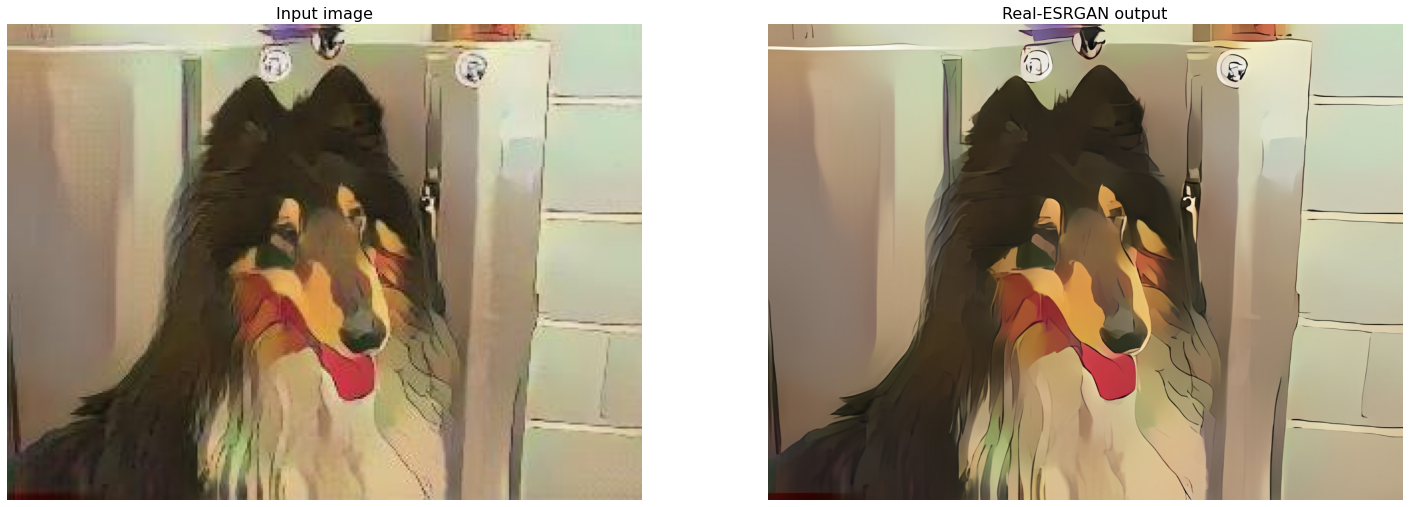

In [ ]:
# utils for visualization
import cv2
import matplotlib.pyplot as plt
def display(img1, img2):
  fig = plt.figure(figsize=(25, 10))
  ax1 = fig.add_subplot(1, 2, 1) 
  plt.title('Input image', fontsize=16)
  ax1.axis('off')
  ax2 = fig.add_subplot(1, 2, 2)
  plt.title('Real-ESRGAN output', fontsize=16)
  ax2.axis('off')
  ax1.imshow(img1)
  ax2.imshow(img2)
def imread(img_path):
  img = cv2.imread(img_path)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  return img

# display each image in the upload folder
import os
import glob

input_folder = 'upload'
result_folder = 'results'
input_list = sorted(glob.glob(os.path.join(input_folder, '*')))
output_list = sorted(glob.glob(os.path.join(result_folder, '*')))
for input_path, output_path in zip(input_list, output_list):
  img_input = imread(input_path)
  img_output = imread(output_path)
  display(img_input, img_output)

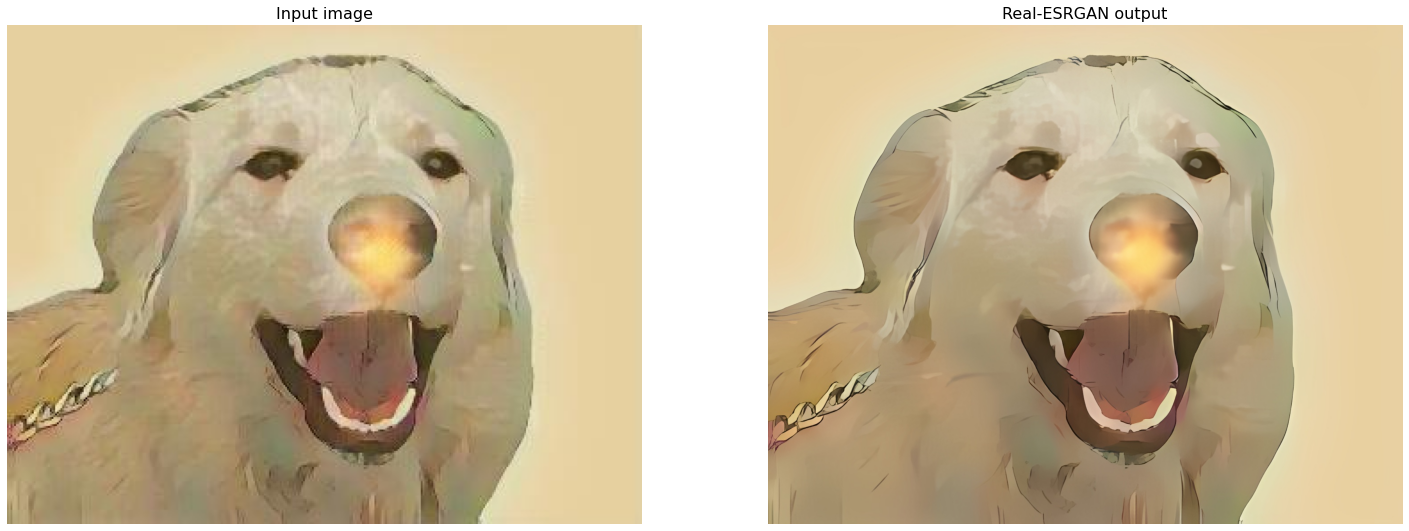

In [6]:
# utils for visualization
import cv2
import matplotlib.pyplot as plt
def display(img1, img2):
  fig = plt.figure(figsize=(25, 10))
  ax1 = fig.add_subplot(1, 2, 1) 
  plt.title('Input image', fontsize=16)
  ax1.axis('off')
  ax2 = fig.add_subplot(1, 2, 2)
  plt.title('Real-ESRGAN output', fontsize=16)
  ax2.axis('off')
  ax1.imshow(img1)
  ax2.imshow(img2)
def imread(img_path):
  img = cv2.imread(img_path)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  return img


img_input = imread('./upload/result.jpg')
img_output = imread('./results/result_out.jpg')
display(img_input, img_output)

In [ ]:
# # Download the results
# zip_filename = 'Real-ESRGAN_result.zip'
# if os.path.exists(zip_filename):
#   os.remove(zip_filename)
# os.system(f"zip -r -j {zip_filename} results/*")
# files.download(zip_filename)